In [132]:
import time
from datetime import date
import pandas as pd
import os
import glob
import pycytominer
import sys
import CBE_utils as CBE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial.distance import correlation
import re
import gc

In [100]:
import importlib
importlib.reload(CBE)

<module 'CBE_utils' from '/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis/notebooks/CBE_utils.py'>

In [101]:
input_path = "/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis/output_files/"
output_path = "/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis/result_files/"

In [102]:
# data_HepG2 = pd.read_csv(input_path + "2023-04-11_Bioactives_HepG2_raw.csv")
pattern = "[A-Z][0-9][0-9][0-9][0-9]_R[1-4].csv"
file_list = glob.glob(input_path + os.sep + '*' + os.sep + pattern, recursive=True)

In [103]:
dataframes_normalized_dict = {}

for file in file_list:
    
    plate_map_name = os.path.splitext(os.path.basename(file))[0]
    
    try:
        
        dataframe = pd.read_csv(file)
        row_count = dataframe.shape[0]
        
        print(f"INFO: {filename} has {row_count} rows")
        
        
    except Exception as e:
        
        print(f"Error reading file {plate_map_name}: {e}")   
        
    features = CBE.get_feature_vector(dataframe)
    metadata_dataframe = set(dataframe.columns) - set(features)
        
    ### convert sets to list
    features_list = list(features)
    metadata_list = list(metadata_dataframe)
        
    number_features = len(features_list)
        
    print(f"INFO: {plate_map_name} has {number_features} features")
        
    # TODO: Adjust to future pycytominer version
    # TODO: Try out other normalization methods
    normalizer = "mad_robustize" 
    
    dataframe_normalized = pycytominer.normalize(
        
        profiles = dataframe,
        features = features,
        meta_features = metadata_dataframe,
        method = normalizer, ### Method to normalize the data
        samples = "Metadata_RoughID == 'DMSO'" # normalization performed on neg. controls
    )
    
    print(f"INFO: Normalized with {normalizer}")
    
    filename_norm_data = plate_map_name + "_" + normalizer + ".csv"
    
    path_norm_data = os.path.dirname(file)
    file_path_norm_data = os.path.join(path_norm_data, filename_norm_data)
    
    dataframe_normalized.to_csv(file_path_norm_data, index=False)
    
    print(f"INFO: Saved {filename_norm_data}")
    
    # TODO: collect them in dictionary for further processing. 
    # TODO: Based on key Date_Source_Plate_replicate
    dict_key = dataframe_normalized['Metadata_imaging_date'][0] + "_" + dataframe_normalized['Metadata_source'][0] + "_" + dataframe_normalized['Metadata_plate_map_name'][0]

    dataframes_normalized_dict[dict_key] = dataframe_normalized

INFO: C1084_R1.csv has 384 rows
INFO: C1160_R2 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1160_R2_mad_robustize.csv
INFO: C1084_R1.csv has 384 rows
INFO: C1160_R3 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1160_R3_mad_robustize.csv
INFO: C1084_R1.csv has 384 rows
INFO: C1091_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1091_R1_mad_robustize.csv
INFO: C1084_R1.csv has 384 rows
INFO: C1092_R1 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1092_R1_mad_robustize.csv
INFO: C1084_R1.csv has 384 rows
INFO: C1089_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1089_R1_mad_robustize.csv
INFO: C1084_R1.csv has 384 rows
INFO: C1085_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1085_R1_mad_robustize.csv
INFO: C1084_R1.csv has 384 rows
INFO: C1093_R1 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1093_R1_mad_robustize.csv
INFO: C1084_R1.csv has 384 rows
INFO: C1158_R4 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1158_R4_mad_robustize.csv
INFO: C1084_R1.csv has 384 rows
INFO: C1158_R2 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1158_R2_mad_robustize.csv
INFO: C1084_R1.csv has 384 rows
INFO: C1157_R4 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1157_R4_mad_robustize.csv
INFO: C1084_R1.csv has 384 rows
INFO: C1159_R2 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1159_R2_mad_robustize.csv
INFO: C1084_R1.csv has 384 rows
INFO: C1160_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1160_R1_mad_robustize.csv
INFO: C1084_R1.csv has 384 rows
INFO: C1157_R3 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1157_R3_mad_robustize.csv
INFO: C1084_R1.csv has 384 rows
INFO: C1086_R1 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1086_R1_mad_robustize.csv
INFO: C1084_R1.csv has 384 rows
INFO: C1160_R4 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1160_R4_mad_robustize.csv
INFO: C1084_R1.csv has 384 rows
INFO: C1087_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1087_R1_mad_robustize.csv
INFO: C1084_R1.csv has 384 rows
INFO: C1157_R1 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1157_R1_mad_robustize.csv
INFO: C1084_R1.csv has 384 rows
INFO: C1088_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1088_R1_mad_robustize.csv
INFO: C1084_R1.csv has 384 rows
INFO: C1159_R3 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1159_R3_mad_robustize.csv
INFO: C1084_R1.csv has 384 rows
INFO: C1090_R1 has 2977 features
INFO: Normalized with mad_robustize


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Saved C1090_R1_mad_robustize.csv
INFO: C1084_R1.csv has 384 rows
INFO: C1084_R1 has 2977 features


/home/schmiedc/miniconda3/envs/paint/lib/python3.9/site-packages/pycytominer/normalize.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  meta_df = profiles.loc[:, meta_features]


INFO: Normalized with mad_robustize
INFO: Saved C1084_R1_mad_robustize.csv


In [120]:
def get_pos_control_correlation(input_dataframe, pos_ctrl_string):
    
    pos_ctrl_dataframe = input_dataframe.loc[input_dataframe['Metadata_RoughID'] == pos_ctrl_string]
    well_1_features = pos_ctrl_dataframe.iloc[0][features].values
    well_2_features = pos_ctrl_dataframe.iloc[1][features].values
    
    corr = np.corrcoef(well_1_features.astype(float), well_2_features.astype(float))
    np.fill_diagonal(corr, np.nan)

    return np.nanmedian(corr)

In [121]:
def get_median_pos_ctrl_correlation(input_dataframe):

    tetrandrine_dataframe = input_dataframe.loc[input_dataframe['Metadata_RoughID'] == 'Tetrandrine']
    tetrandrine_median_features = tetrandrine_dataframe[features].median(axis=0)

    nocodazole_dataframe = input_dataframe.loc[input_dataframe['Metadata_RoughID'] == 'Nocodazole']
    nocodazole_median_features = nocodazole_dataframe[features].median(axis=0)
    
    corr = np.corrcoef(tetrandrine_median_features.astype(float), nocodazole_median_features.astype(float))
    np.fill_diagonal(corr, np.nan)

    return np.nanmedian(corr)

In [123]:
def pad_numbers(value):
    match = re.match(r"([A-Z])(\d+)", value)
    if match:
        letter = match.group(1)
        number = match.group(2).zfill(2)  # Pad number to 2 digits
        return f"{letter}{number}"
    return value

In [147]:
annotation_dir = "/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis/annotation_files/"

# Within plate comparison

In [165]:
imaging_date = []
plate_name = []
replicate_number = []
plate_map_name = []
plate_code_list = []
user = []
source = []
picklist_name = []
noco_corr = []
tet_corr = []
pos_ctrl_corr = []
test_corr_noco_all = {}
test_corr_tet_all = {}
test_corr_pos_ctrl_all = {}

for plate_code in key_list:
    
    layout_dictionary = {'R1':'Picklist_Replicate1.csv',
                     'R2':'Picklist_Replicate2.csv',
                     'R3':'Picklist_Replicate3.csv',
                     'R4':'Picklist_Replicate4.csv'
                    }

    
    print(f"Testing {plate_code}")
    
    print(f"Original layout is {dataframe_for_QC1['Metadata_replicate_number'][0]}")
    
    dataframe_for_QC1 = dataframes_normalized_dict[plate_code]

    features = CBE.get_feature_vector(dataframe_for_QC1)
    metadata_dataframe = set(dataframe_for_QC1.columns) - set(features)
        
    ### convert sets to list
    features_list = list(features)
    metadata_list = list(metadata_dataframe)
    
    imaging_date.append(dataframe_for_QC1['Metadata_imaging_date'][0])
    plate_name.append(dataframe_for_QC1['Metadata_plate_name'][0])
    replicate_number.append(dataframe_for_QC1['Metadata_replicate_number'][0])
    plate_map_name.append(dataframe_for_QC1['Metadata_plate_map_name'][0])
    plate_code_list.append(plate_code)
    user.append(dataframe_for_QC1['Metadata_user'][0])
    source.append(dataframe_for_QC1['Metadata_source'][0])
    picklist_name.append(dataframe_for_QC1['Metadata_picklist_name'][0])
    noco_corr.append(get_pos_control_correlation(dataframe_for_QC1, 'Nocodazole'))
    tet_corr.append(get_pos_control_correlation(dataframe_for_QC1, 'Tetrandrine'))
    pos_ctrl_corr.append(get_median_pos_ctrl_correlation(dataframe_for_QC1))
    
    test_corr_noco = {}
    test_corr_tet = {}
    test_corr_pos_ctrl = {}
    
    # test through all layouts including original 
    for layout_number in layout_dictionary:
    
        # create copy from orginal QC dataframe
        dataframe_for_QC_test = dataframe_for_QC1.copy()

        # remove columns associated with original well info
        dataframe_for_QC_test = dataframe_for_QC_test.drop(['Metadata_RoughID', 'Metadata_picklist_name', 'Metadata_Well'], axis=1)

        # add ID to make sure we know and it does not contaminate our data
        dataframe_for_QC_test['Metadata_picklist_name'] = 'test_layout_' + layout_number

        plate_layout_path = os.path.join(annotation_dir, 'plate_layout', layout_dictionary[layout_number])
        plate_layout = pd.read_csv(plate_layout_path)

        # Issue in the plate layout the well numbers are not padded
        plate_layout['Destination Well'] = plate_layout['Destination Well'].apply(pad_numbers)
        plate_layout['Source Well'] = plate_layout['Source Well'].apply(pad_numbers)

        # rename the columns accordingly
        plate_layout = plate_layout.rename(columns={"Destination Well": "Metadata_Well_randomized"})
        plate_layout = plate_layout.rename(columns={"Source Well": "Metadata_Well"})
         
        dataframe_for_QC_test = pd.merge(dataframe_for_QC_test, plate_layout, on='Metadata_Well_randomized')

        # get info for pos. and neg. controls
        controls_layout_path = os.path.join(annotation_dir, "pos_neg_ctrl.csv")
        controls_layout = pd.read_csv(controls_layout_path)

        # Issue in the plate layout the well numbers are not padded
        controls_layout['Metadata_Well'] = controls_layout['Metadata_Well'].apply(pad_numbers)

        dataframe_for_QC_test = pd.merge(dataframe_for_QC_test, controls_layout, on='Metadata_Well')
        
        test_corr_noco['Layout_test_noco_' + layout_number] = get_pos_control_correlation(dataframe_for_QC_test, 'Nocodazole')
        test_corr_tet['Layout_test_tet_' + layout_number] = get_pos_control_correlation(dataframe_for_QC_test , 'Tetrandrine')
        test_corr_pos_ctrl['Layout_test_pos_ctrl_' + layout_number] = get_median_pos_ctrl_correlation(dataframe_for_QC_test)
    
        del dataframe_for_QC_test
        gc.collect()
        
        
    test_corr_noco_all[plate_code] = test_corr_noco
    test_corr_tet_all[plate_code] = test_corr_tet
    test_corr_pos_ctrl_all[plate_code] = test_corr_pos_ctrl
    

quality_control_1 = {
    'Metadata_imaging_date': imaging_date,
    'Metadata_plate_name': plate_name,
    'Metadata_replicate_number': replicate_number,
    'Metadata_plate_map_name': plate_map_name,
    'Metadata_plate_code': plate_code_list,
    'Metadata_user': user,
    'Metadata_source':source,
    'Metadata_noco_corr': noco_corr,
    'Metadata_tet_corr': tet_corr,
    'Metadata_pos_ctrl_corr': pos_ctrl_corr,
}

Testing 2024-06-15_USC_C1160_R2
Original layout is R1
Testing 2024-06-15_USC_C1160_R3
Original layout is R2
Testing 2024-06-06_FMP_C1091_R1
Original layout is R3
Testing 2024-06-06_FMP_C1092_R1
Original layout is R1
Testing 2024-06-05_FMP_C1089_R1
Original layout is R1
Testing 2024-06-05_FMP_C1085_R1
Original layout is R1
Testing 2024-06-06_FMP_C1093_R1
Original layout is R1
Testing 2024-06-15_USC_C1158_R4
Original layout is R1
Testing 2024-06-15_USC_C1158_R2
Original layout is R4
Testing 2024-06-14_USC_C1157_R4
Original layout is R2
Testing 2024-06-15_USC_C1159_R2
Original layout is R4
Testing 2024-06-15_USC_C1160_R1
Original layout is R2
Testing 2024-06-14_USC_C1157_R3
Original layout is R1
Testing 2024-06-05_FMP_C1086_R1
Original layout is R3
Testing 2024-06-15_USC_C1160_R4
Original layout is R1
Testing 2024-06-05_FMP_C1087_R1
Original layout is R4
Testing 2024-06-14_USC_C1157_R1
Original layout is R1
Testing 2024-06-05_FMP_C1088_R1
Original layout is R1
Testing 2024-06-17_USC_C1159

In [166]:
quality_control_1_df = pd.DataFrame(quality_control_1)

quality_control_1_noco_test_corr = pd.DataFrame.from_dict(test_corr_noco_all, orient='index')
quality_control_1_noco_test_corr = quality_control_1_noco_test_corr.reset_index().rename(columns={"index":"Metadata_plate_code"})

quality_control_1_tet_test_corr = pd.DataFrame.from_dict(test_corr_tet_all, orient='index')
quality_control_1_tet_test_corr = quality_control_1_tet_test_corr.reset_index().rename(columns={"index":"Metadata_plate_code"})

quality_control_1_pos_ctrl_corr = pd.DataFrame.from_dict(test_corr_pos_ctrl_all, orient='index')
quality_control_1_pos_ctrl_corr = quality_control_1_pos_ctrl_corr.reset_index().rename(columns={"index":"Metadata_plate_code"})

test_correlations = pd.merge(quality_control_1_noco_test_corr, quality_control_1_tet_test_corr, on='Metadata_plate_code')
test_correlations = pd.merge(test_correlations, quality_control_1_pos_ctrl_corr, on='Metadata_plate_code')

In [169]:
quality_control_1_df = pd.DataFrame(quality_control_1) 

file_path_quality_control_1 = os.path.join(output_path, 'quality_control_1.csv')
quality_control_1_df .to_csv(file_path_quality_control_1, index=False)

file_path_test_correlations = os.path.join(output_path, 'test_correlations.csv')
test_correlations.to_csv(file_path_test_correlations, index=False)

In [ ]:
# TODO: Determine a baseline
# TODO: Visualization

In [186]:
quality_control_1_melt = pd.melt(quality_control_1_df, 
        id_vars = ["Metadata_imaging_date",
                   "Metadata_plate_name",
                   "Metadata_replicate_number",
                   "Metadata_plate_map_name",
                   "Metadata_plate_code",
                   "Metadata_user",
                   "Metadata_source"],
        value_vars = ["Metadata_noco_corr", 
                      "Metadata_tet_corr", 
                      "Metadata_pos_ctrl_corr"],
        var_name="Test",
        value_name="Correlation")

FMP_quality_control_1 = quality_control_1_melt.loc[quality_control_1_melt['Metadata_source'] == 'FMP']

In [187]:
import seaborn as sns

<Figure size 1008x504 with 0 Axes>

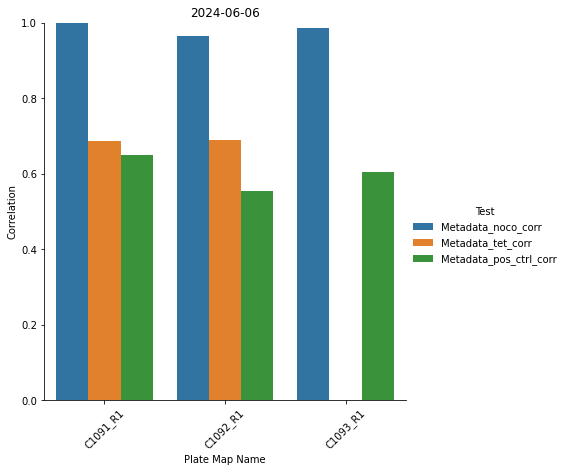

<Figure size 1008x504 with 0 Axes>

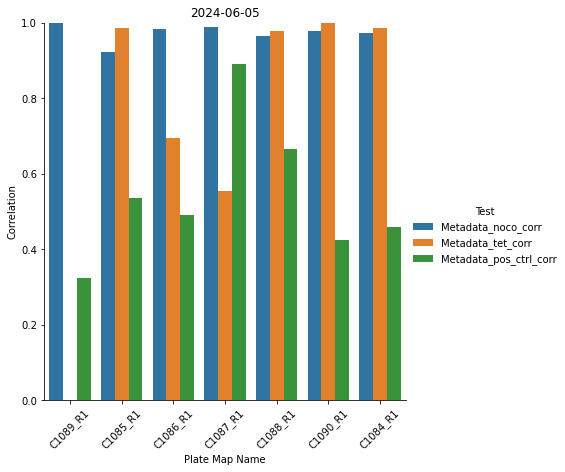

In [259]:
imaging_date_list = FMP_quality_control_1["Metadata_imaging_date"].unique()

for date in imaging_date_list:
    
    FMP_qc = FMP_quality_control_1.loc[FMP_quality_control_1["Metadata_imaging_date"] == date]
    
    plt.figure(figsize=(14, 7))
    
    sns.catplot(FMP_qc,
                       kind="bar",
                       x="Metadata_plate_map_name",
                       y="Correlation",
                       hue="Test",
                       height=6,
                       aspect=1)
    
    plt.title(date)
    plt.xlabel('Plate Map Name')
    plt.ylabel('Correlation')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    
    plt.savefig(output_path + os.sep + date + '_' + 'FMP_QC1.svg', format='svg')
    

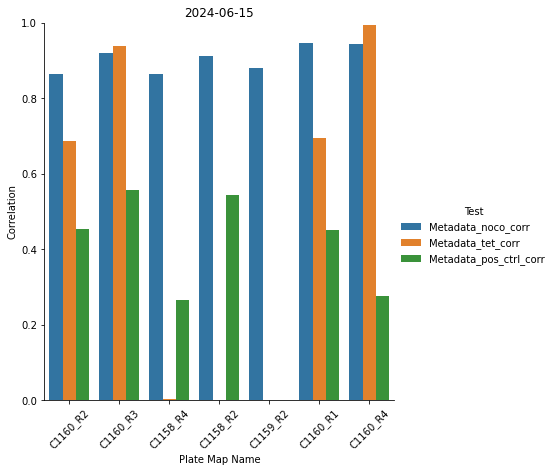

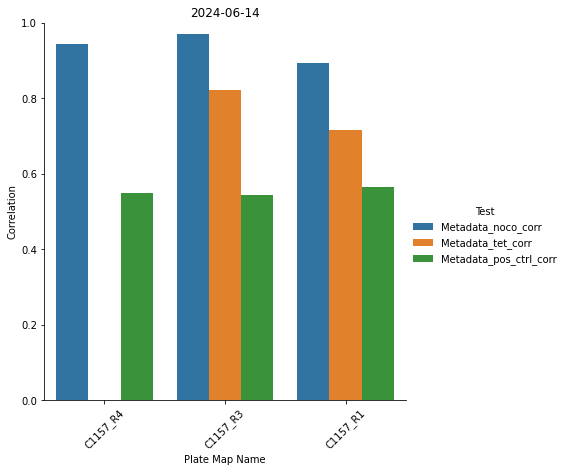

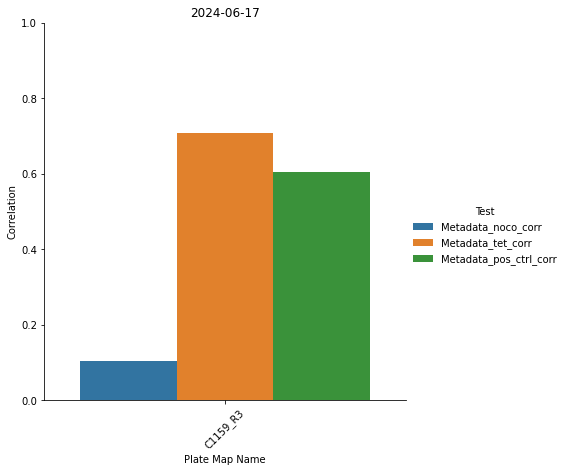

In [263]:
imaging_date_list = USC_quality_control_1["Metadata_imaging_date"].unique()

for date in imaging_date_list:
    
    qc = USC_quality_control_1.loc[USC_quality_control_1["Metadata_imaging_date"] == date]
    
    sns.catplot(qc,
                kind="bar",
                x="Metadata_plate_map_name",
                y="Correlation",
                hue="Test",
                height=6,
                aspect=1)
    
    plt.title(date)
    plt.xlabel('Plate Map Name')
    plt.ylabel('Correlation')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    
    plt.savefig(output_path + os.sep + date + '_' + 'USC_QC1.svg', format='svg')

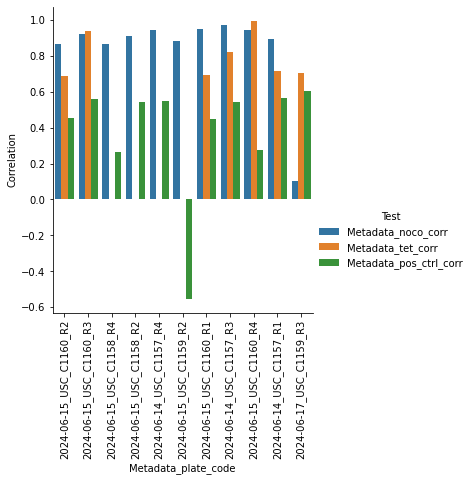

In [258]:
USC_quality_control_1 = quality_control_1_melt.loc[quality_control_1_melt['Metadata_source'] == 'USC']

plot = sns.catplot(USC_quality_control_1,
                   kind="bar",
                   x="Metadata_plate_code",
                   y="Correlation",
                   hue="Test")

plot.set_xticklabels(rotation=90)

# Other metrics

In [107]:
# Correlation distance
# perfectly correlated with correlation coefficient equal to 1 has zero distance 
# perfectly negatively correlated with correlation coefficient equal to -1 has maximal distance at 2
# inverse of correlation and only looks at the angle/similarity among patterns (sort of like normalization). 
# Correlational distance goes from 0 - 2, with 0 being PERFECT correlation, 1 being no correlation, and 2 being PERFECT ANTICORRELATION. 

In [ ]:
def get_pos_control_distance(input_dataframe, pos_ctrl_string):
    
    pos_ctrl_dataframe = input_dataframe.loc[input_dataframe['Metadata_RoughID'] == pos_ctrl_string]
    well_1_features = pos_ctrl_dataframe.iloc[0][features].values
    well_2_features = pos_ctrl_dataframe.iloc[1][features].values

    return correlation(well_1_features, well_2_features, centered = True)

In [ ]:
print(get_pos_control_distance(test_df, 'Nocodazole'))
print(get_pos_control_distance(test_df, 'Tetrandrine'))

In [115]:
# Should the DMSO be considered for comparison
# Does this make sense after normalization?
dmso_dataframe = dataframe_normalized.loc[dataframe['Metadata_RoughID'] == 'DMSO']
dmso_median_features = dmso_dataframe[features].median(axis=0)

corr_noco_dmso = correlation(nocodazole_median_features, dmso_median_features, centered = True)
corr_noco_dmso

corr_tet_dmso = correlation(tetrandrine_median_features, dmso_median_features, centered = True)
corr_tet_dmso

1.0002360393902132

## Other correlation based comparison

In [118]:
def feature_corr(df1, df2):
    
    corr = np.corrcoef(df1.astype(float), df2.astype(float))
    np.fill_diagonal(corr, np.nan)
    
    return np.nanmedian(corr)

In [119]:
feature_corr(tetrandrine_median_features, nocodazole_median_features)

0.4597470817190612

In [120]:
feature_corr(tetrandrine_well_1_features, tetrandrine_well_2_features)

0.9863459123830671

In [121]:
feature_corr(nocodazole_well_1_features, nocodazole_well_2_features)

0.9720824810732367

In [122]:
# Overall seems to yield useful values
# We can compute consensus values also then
# Test to see what happens if it fails i.e. wrong platelayout is used
# Thresholds could be: <0.3 for corr
# >0.3 for non correlation
# Oberservation from real world data will help
# Also again feature selection will make this more robust
# An alternative could be to use DMSO independent normalization
# At least for the detection of Plate layout issue

# Comparison over plates

In [123]:
# TODO: Correlation of pos. & neg. controls over time
# TODO: Compute consensus per normalized plate for pos. controls
# TODO: Implement consensus of first plates of specific source
# TODO: Then with an external control from the bioactives

In [170]:
dataframes_normalized_dict

{'2024-06-15_USC_C1160_R2':     Metadata_Plate  Metadata_imaging_timezone Metadata_plate_name  \
 0          C1160R2                        200               C1160   
 1          C1160R2                        200               C1160   
 2          C1160R2                        200               C1160   
 3          C1160R2                        200               C1160   
 4          C1160R2                        200               C1160   
 ..             ...                        ...                 ...   
 379        C1160R2                        200               C1160   
 380        C1160R2                        200               C1160   
 381        C1160R2                        200               C1160   
 382        C1160R2                        200               C1160   
 383        C1160R2                        200               C1160   
 
     Metadata_Well Metadata_Well_randomized Metadata_RoughID  \
 0             A14                      A01          EOS_cpd   
 1 

In [148]:
# Filter for pos. control tetrandrine
# Metadata_RoughID = Tetrandrine
# Should be C24 and D24
other_tetrandrine_dataframe = other_dataframe_normalized.loc[dataframe['Metadata_RoughID'] == 'Tetrandrine']

# get features for first and second tet well
other_tetrandrine_median_features = other_tetrandrine_dataframe[features].median(axis=0)

correlation(other_tetrandrine_median_features, tetrandrine_median_features, centered = True)

0.685135273510096

In [149]:
# Filter pos. ctrl Nocodazole
# Metadata_RoughID = Nocodazole
# Should be A24 and B24
other_nocodazole_dataframe = other_dataframe_normalized.loc[dataframe['Metadata_RoughID'] == 'Nocodazole']

# get features for first and second noco well
other_nocodazole_median_features = other_nocodazole_dataframe[features].median(axis=0)
correlation(nocodazole_median_features, other_nocodazole_median_features, centered = True)

0.0958805673067663

In [150]:
correlation(other_tetrandrine_median_features, other_nocodazole_median_features)

0.3500988296480524

In [151]:
# Filter pos. ctrl Nocodazole
# Metadata_RoughID = Nocodazole
# Should be A24 and B24
other_dmso_dataframe = other_dataframe_normalized.loc[dataframe['Metadata_RoughID'] == 'DMSO']
other_dmso_median_features = dmso_dataframe[features].median(axis=0)

correlation(other_dmso_median_features, dmso_median_features, centered = True)

0.0

In [152]:
feature_corr(other_tetrandrine_median_features, tetrandrine_median_features)

0.3148647264898983

In [153]:
feature_corr(other_nocodazole_median_features, nocodazole_median_features)

0.904119432693222

In [154]:
feature_corr(other_dmso_median_features, dmso_median_features)

1.0

In [155]:
# TODO: Automate over all available plates
# TODO: Record as table with date, plate_names, source, user and other information

# Compute metrics over replicates

In [ ]:
# TODO: If all replicates exist:
# TODO: Feature reduction per plate
# TODO: Compute number of toxic compounds
# TODO: Compute raw % replication
# TODO: Compute compound activity based on DMSO
# TODO: Compute % replication after compound filters

# Next Layer of implementation

In [ ]:
# TODO: QC visualization: per plate, per batch, per source

In [ ]:
# TODO: Setup plate layout test to check if faulty plate layout will get detected
# TODO: Check if alternative normalization method that is independent of the layout

In [ ]:
# TODO: Implement Correlation of pos. & neg. controls over time and track over time

In [ ]:
# Better automation with data that trickles in